In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import itertools


In [2]:

length_values = 60


uni_label = ["noise",
"youtube",
"messenger" ,
"twitch" ,
"skype" ,
"spotify"]

In [14]:

def merge_data(filename, global_data) :
    
    data = pd.read_csv(filename)
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    data["label"] = data["label"].replace(to_replace = "pure_noise", value = "noise")
    #data.drop(columns={})
    data.set_index(pd.to_datetime(data.Time), inplace=True)
    
    id_acquis = data.id_acquisition.iloc[0]
    
    for val in tqdm(data.connection_id.unique()):
        current_data = data[data.connection_id==val]
        label = current_data.label.value_counts(sort = True, ascending =False).index[0]

        #global_data[f"{id_acquis}_{val}"]=(current_data.index, current_data.TBS_2,label)

        global_data[f"{filename}_{val}"]=(current_data.index, current_data.TBS_2,label)

    return global_data

def reformat_data(global_data) :
    res_n, res_dura, labels, res_id = [],[],[],[]
    for key, value in tqdm(global_data.items()) :
        res_n.append(len(value[0]))
        dura = (value[0][-1]-value[0][0]).total_seconds()
        res_dura.append(dura)
        res_id.append(key)

        labels.append(value[2])

    df = pd.DataFrame({"id":res_id,"Duration(s)" : res_dura, "Duration(measures)" : res_n, "label" : labels})   
    return df

def plot_histo(data) : 
    bins = 10*np.exp(np.arange(0,9,0.5))
    bins = np.insert(bins, 0, 0)
    fig, ax = plt.subplots(figsize=(16,16))
    
    vals = []
    for lab in uni_label :
        current_data = data[data["label"]==lab]["Duration(s)"]
        vals.append(current_data.values)
    new_data = np.array(vals)
    print(new_data.shape)
    plt.hist(new_data,stacked=True, bins=bins, alpha = 0.9)
    
    ax.set_xscale('log')
    ax.set_xlabel("Duration (s)")
    ax.set_ylabel("Proportion")
    ax.set_title("Measures duration Distribution")
    ax.legend(uni_label)

In [15]:
global_data = {}
directory_data = "../Mesures/train"
datasets_train = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]


for i, data in enumerate(datasets_train) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets_train)}")
    global_data = merge_data(file, global_data)
    
df_train = reformat_data(global_data)
df_train

Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/33


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 79.60it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/33


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 32.97it/s]


Extracting ../Mesures/train\messenger20221124_151137.csv.... 3/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.25it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 4/33


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 75.23it/s]


Extracting ../Mesures/train\messenger20221125_150706.csv.... 5/33


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:03<00:00, 91.13it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 6/33


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 10.75it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 7/33


100%|███████████████████████████████████████████████████████████████████████████████| 839/839 [00:01<00:00, 763.63it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 8/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.39it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 9/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 31.42it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 10/33


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 11/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.54it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 12/33


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 35.49it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 13/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 26.47it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 14/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.69it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 15/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.52it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 16/33


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 95.73it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 17/33


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 45.13it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 18/33


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:01<00:00, 71.13it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 19/33


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 81.60it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 20/33


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 255.13it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 21/33


100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:00<00:00, 530.84it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 22/33


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 412.21it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 23/33


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 285.70it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 24/33


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 904.93it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 25/33


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 701.38it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 26/33


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 917.49it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 27/33


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 951.65it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 28/33


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 762.90it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 29/33


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 394.70it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 30/33


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 436.07it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 31/33


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 383.91it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 32/33


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 540.96it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 33/33


100%|███████████████████████████████████████████████████████████████████████████| 2958/2958 [00:00<00:00, 29511.85it/s]


,id,Duration(s),Duration(measures),label
0,../Mesures/train\messenger20221117_125310.csv_4,2777.818,364319,messenger
1,../Mesures/train\messenger20221117_125310.csv_5,0.077,11,messenger
2,../Mesures/train\messenger20221117_125310.csv_6,0.077,11,messenger
3,../Mesures/train\messenger20221117_125310.csv_8,9.331,1230,messenger
4,../Mesures/train\messenger20221117_125310.csv_7,9.427,1229,messenger
...,...,...,...,...
2953,../Mesures/train\youtube20230117_095221.csv_139,157.435,13654,youtube
2954,../Mesures/train\youtube20230117_095221.csv_140,19.025,1019,youtube
2955,../Mesures/train\youtube20230117_095221.csv_141,22.515,1246,youtube
2956,../Mesures/train\youtube20230117_095221.csv_142,10.935,697,youtube


C:\Users\Malo\AppData\Local\Temp\ipykernel_12196\1627172334.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(vals)


(6,)


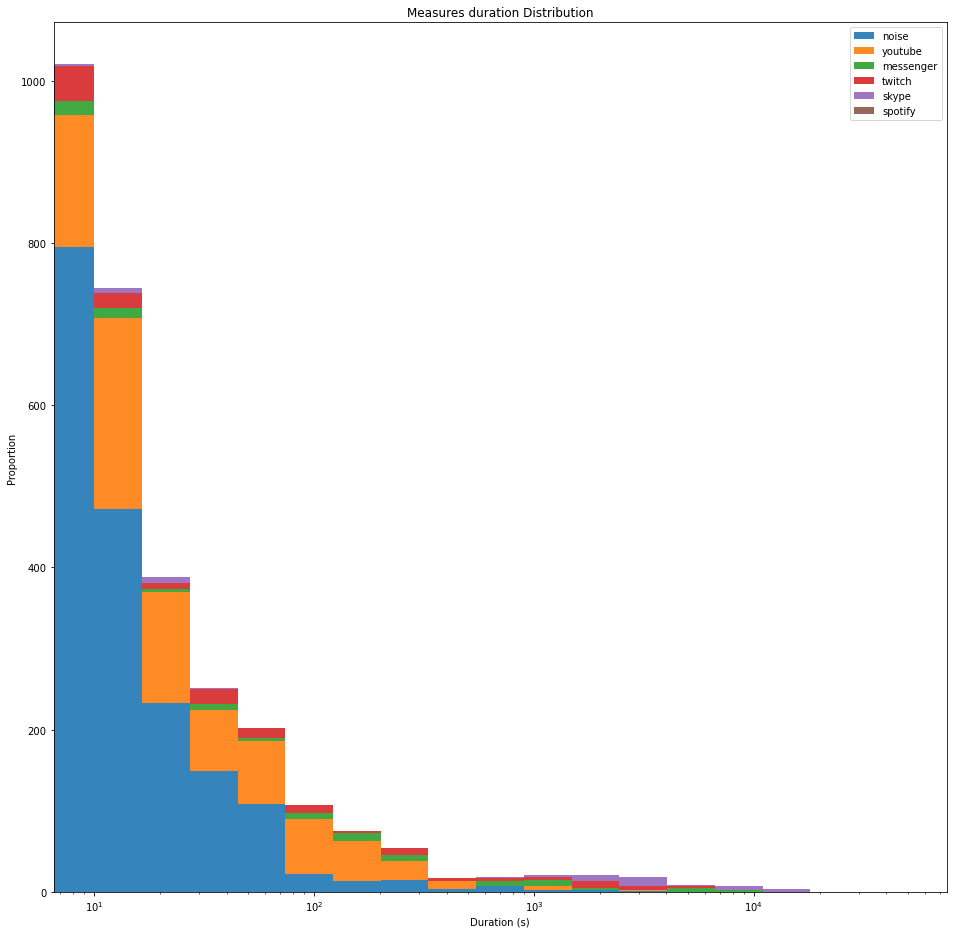

In [16]:
plot_histo(df_train)

In [19]:
df_train[df_train.label == "noise"].sort_values(by=["Duration(s)"])

,id,Duration(s),Duration(measures),label
486,../Mesures/train\pure_noise20230106_132210.csv_70,0.007,2,noise
861,../Mesures/train\pure_noise20230106_132210.csv...,0.008,2,noise
854,../Mesures/train\pure_noise20230106_132210.csv...,0.008,3,noise
574,../Mesures/train\pure_noise20230106_132210.csv...,0.008,2,noise
891,../Mesures/train\pure_noise20230106_132210.csv...,0.010,2,noise
...,...,...,...,...
160,../Mesures/train\messenger20221125_150706.csv_94,1328.447,6155,noise
254,../Mesures/train\messenger20221125_150706.csv_188,1708.357,9370,noise
1180,../Mesures/train\pure_noise20230106_132210.csv...,1862.255,8423,noise
1275,../Mesures/train\skype20221206_125510.csv_16,2031.235,11391,noise


In [8]:
directory_data = "../Mesures/test"
datasets_test = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]

global_data = {}
for i, data in enumerate(datasets_test) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets_test)}")
    global_data = merge_data(file, global_data)
    
df_test = reformat_data(global_data)
df_test

Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/6


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.44it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 2/6


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.35it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 3/6


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 765.99it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 4/6


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 28.08it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 5/6


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 802.48it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 6/6


100%|█████████████████████████████████████████████████████████████████████████████| 738/738 [00:00<00:00, 33667.94it/s]


,Duration(s),Duration(measures),label
0,1476.499,207461,messenger
1,1478.364,176772,messenger
2,13.897,225,messenger
3,1458.168,223311,messenger
4,1436.634,214612,messenger
...,...,...,...
733,10.171,30,youtube
734,21.255,563,youtube
735,21.815,541,youtube
736,107.245,2991,youtube


<ipython-input-4-a96e4c66e94d>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(vals)


(6,)


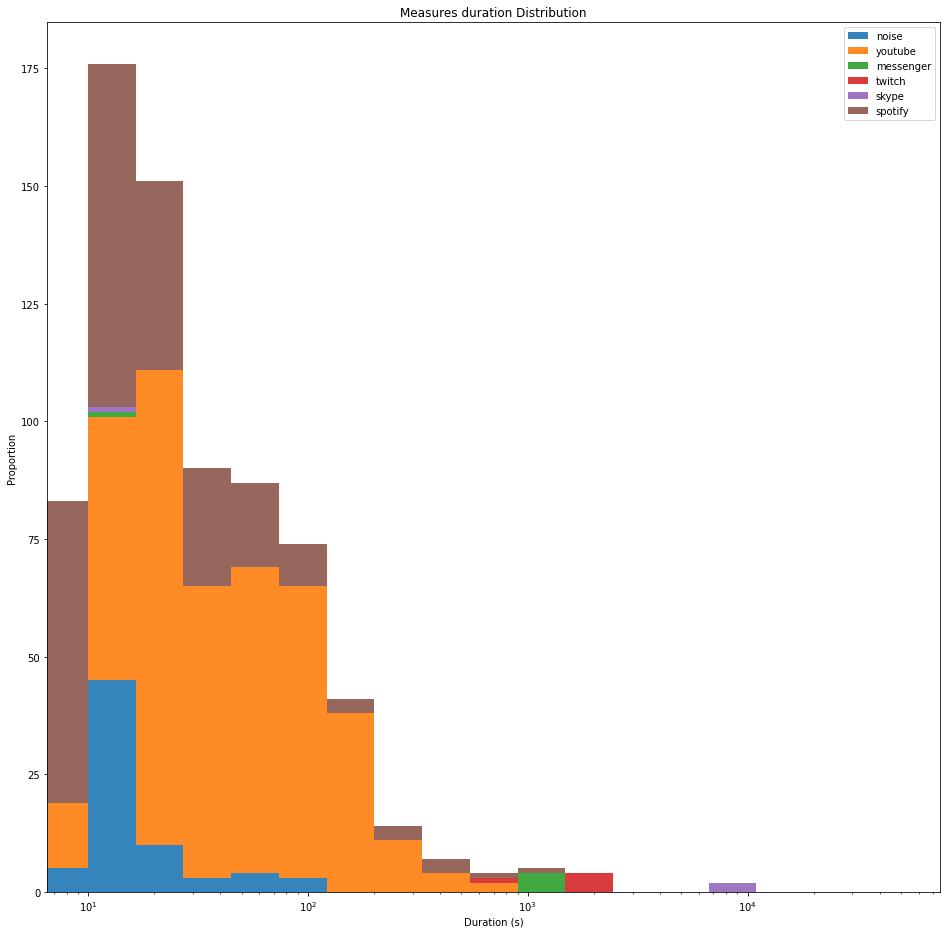

In [9]:
plot_histo(df_test)